# Figure 6

In this notebook we produce figure 6 from Donald-McCann, Koyama, Beutler (in-prep). We will be producing this plot with `GetDist` [Lewis (2019)](https://arxiv.org/abs/1910.13970).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import getdist
from getdist import plots, MCSamples

As with most of the other notebooks in this repo we start by specifying the repo location.

In [2]:
path_to_repo = "/Users/jamie/Desktop/GitHubProjects/matryoshka_II_paper/"

We start by loading the 6 chains run with $V_s^{1/3}=3700\ \mathrm{Mpc}\ h^{-1}$, and the importance weights calculated with `PyBird`.

In [3]:
CMASS2V1 = []
for i in range(6):
    CMASS2V1.append(np.load(path_to_repo+"results/chain--EFTEMU_z-0.61_V-3700_kmin-def_kmax-def_{i}.npy".format(i=i)))
CMASS2V1 = np.vstack(CMASS2V1)
weights = np.load(path_to_repo+"results/weights--EFTEMU_z-0.61_Vc-3700_Vi-5000_kmin-def_kmax-def_all.npy")

Next we load the chain from the MCMC with $V_s^{1/3}=5000\ \mathrm{Mpc}\ h^{-1}$.

In [4]:
CMASS2V2 = np.load(path_to_repo+"results/chain--EFTEMU_z-0.61_V-5000_kmin-def_kmax-def_0.npy")

We then define labels, names, and the ranges of any uniform priors.

In [5]:
labels = [r"\omega_c",r"h",r"A_s", r"b_1", r"c_2", r"b_3", r"c_{ct}", r"c_{r,1}",
          r"c_{\epsilon,1}", r"c_{\epsilon,quad}"]
names = ["omega_c","h","As", "b1", "c2", "b3", "cct", "cr1", "ce1", "cq"]

bounds_dict = {"omega_c": [0.109988, 0.129229], 
               "h": [0.57451438, 0.74766042], 
               "As": [2.77885117, 3.32142323], 
               "b1": [0., 4.], 
               "c2": [-4., 4.]}

We now pass the chains and the lebels etc. to `GetDist`.

In [6]:
CMASS2V1_samples = MCSamples(samples=CMASS2V1, names=names, labels=labels, label=r"EFTEMU $V_s = 3700^3$", 
                             ranges=bounds_dict)
CMASS2V1_samples.updateSettings({'smooth_scale_2D': 0.4, 'smooth_scale_1D':0.2})

CMASS2_samples = MCSamples(samples=CMASS2V2, names=names, labels=labels, label=r"EFTEMU $V_s = 5000^3$", 
                           ranges=bounds_dict)
CMASS2_samples.updateSettings({'smooth_scale_2D': 0.4, 'smooth_scale_1D':0.2})

pybird_samples = MCSamples(samples=CMASS2V1, names=names, labels=labels, weights=weights,
                           label="PyBird $V_s = 5000^3$", ranges=bounds_dict)
pybird_samples.updateSettings({'smooth_scale_2D': 0.4, 'smooth_scale_1D':0.2})

Removed no burn in
Removed no burn in
Removed no burn in


We define the truths,

In [7]:
cosmo_true = np.array([0.11933, 0.02242, 0.6766, 3.047, 0.9665])
bs_CMASS = np.array([2.22, 1.2, 0.1, 0.0, 0.4, -7.7, 0., 0., 0., -3.7])
truths = np.concatenate([cosmo_true[[0,2,3]], bs_CMASS[[0,1,2,4,5,7,9]]])

and produce the corner plot.

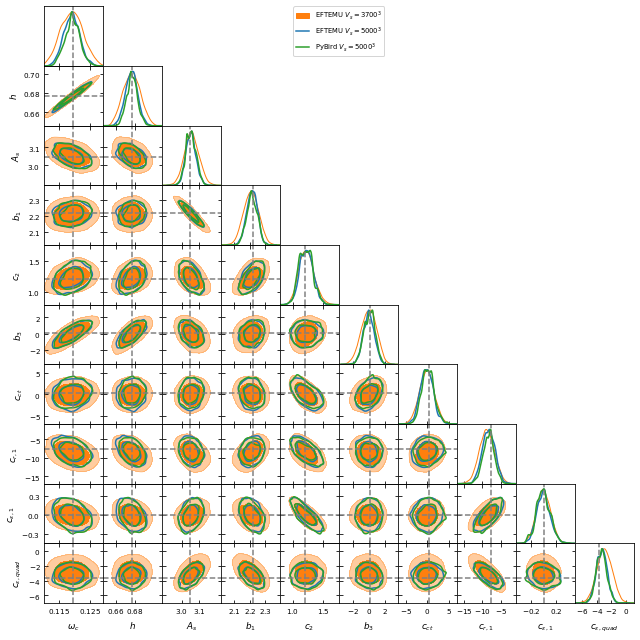

In [8]:
g = plots.get_subplot_plotter(width_inch=9)

g.settings.axes_fontsize = 12.5

g.triangle_plot([CMASS2V1_samples, CMASS2_samples, pybird_samples], filled=[True, False, False],
                contour_colors=['tab:orange', 'tab:blue', 'tab:green'], contour_lws=[1., 1.5, 1.5])

# Note: This loop of axes is not really needed.
# GetDist has functionality for adding truths.
for i in range(truths.shape[0]):
    for j in range(truths.shape[0]):
        if i == j:
            g.subplots[i,j].axvline(truths[i], color='gray', ls='--')
        elif j < i:
            g.subplots[i,j].axvline(truths[j], color='gray', ls='--')
            g.subplots[i,j].axhline(truths[i], color='gray', ls='--')
            
g.export(path_to_repo+"plots/corner_pybird--all.pdf")